In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import inception_resnet_v2


import pickle
from skimage.transform import resize
from skimage.io import imread

from google.colab import files
import os
import requests

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
model = tf.keras.models.load_model('drive/MyDrive/mini_project_model')

In [13]:
dataset, info = tfds.load(name="stanford_dogs", with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incomplete7I4GSI/stanford_dogs-train.tfrecord


  0%|          | 0/12000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incomplete7I4GSI/stanford_dogs-test.tfrecord


  0%|          | 0/8580 [00:00<?, ? examples/s]

Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


In [14]:
training_data = dataset['train']

In [4]:
opener = open(f'drive/MyDrive/dict_of_labels.pickle', 'rb')
named_labels = pickle.load(opener)
opener.close()

In [5]:
for label in named_labels:
  print(named_labels[label])

Chihuahua
Japanese_spaniel
Maltese_dog
Pekinese
Shih_Tzu
Blenheim_spaniel
papillon
toy_terrier
Rhodesian_ridgeback
Afghan_hound
basset
beagle
bloodhound
bluetick
black_and_tan_coonhound
Walker_hound
English_foxhound
redbone
borzoi
Irish_wolfhound
Italian_greyhound
whippet
Ibizan_hound
Norwegian_elkhound
otterhound
Saluki
Scottish_deerhound
Weimaraner
Staffordshire_bullterrier
American_Staffordshire_terrier
Bedlington_terrier
Border_terrier
Kerry_blue_terrier
Irish_terrier
Norfolk_terrier
Norwich_terrier
Yorkshire_terrier
wire
Lakeland_terrier
Sealyham_terrier
Airedale
cairn
Australian_terrier
Dandie_Dinmont
Boston_bull
miniature_schnauzer
giant_schnauzer
standard_schnauzer
Scotch_terrier
Tibetan_terrier
silky_terrier
soft
West_Highland_white_terrier
Lhasa
flat
curly
golden_retriever
Labrador_retriever
Chesapeake_Bay_retriever
German_short
vizsla
English_setter
Irish_setter
Gordon_setter
Brittany_spaniel
clumber
English_springer
Welsh_springer_spaniel
cocker_spaniel
Sussex_spaniel
Irish

In [11]:
def name_the_breed(raw_picture, model, named_labels):
  picture = resize(raw_picture, (299, 299), preserve_range = True)
  picture = tf.keras.applications.inception_resnet_v2.preprocess_input(picture)
  picture = tf.expand_dims(picture, axis = 0)
  predictions1 = model.predict(picture)
  predictions = predictions1[0]
  prediction = max(predictions)
  predictions = list(predictions)
  index1 = list(predictions).index(prediction)
  prediction1 = f'This is a {named_labels[index1]} with {round((100 * prediction), 2)} % certainty'
  indexvalues = list(predictions)
  predictions.sort()
  max2 = predictions[-2]
  index2 = indexvalues.index(max2)
  prediction2 = f'2nd best prediction - {named_labels[index2]} with {round((100 * max2), 2)} % certainty'
  return  [index1, prediction1, prediction2]

In [46]:
def get_dog_images(index) :
  f, axarr = plt.subplots(1,5,figsize=(20, 20))
  count = 0
  for x in training_data:
    if x['label'].numpy() == index :
      axarr[count].imshow(x['image'])
      count = count + 1
    if count == 5:
      plt.show()
      return

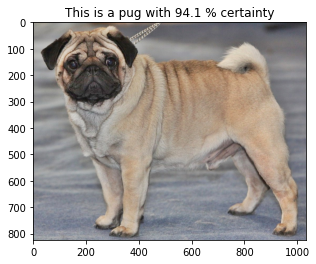

More images of pug -


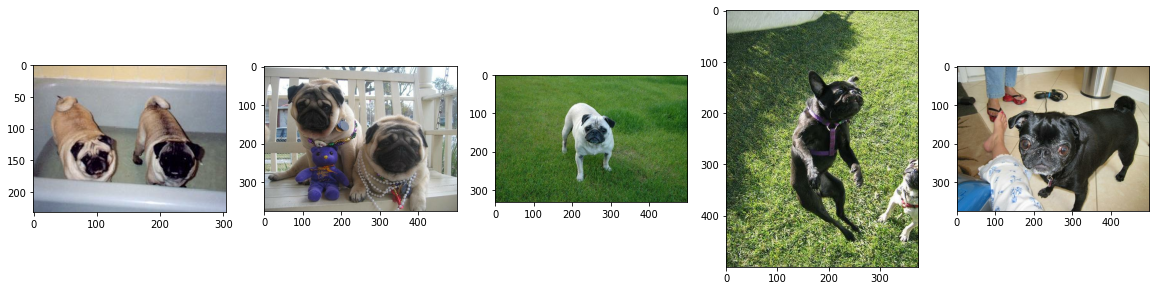

2nd best prediction - chow with 1.05 % certainty


In [79]:
dog_image = 'https://upload.wikimedia.org/wikipedia/commons/f/f0/Mops_oct09_cropped2.jpg'
try:
  dog_image = imread(dog_image)
  plt.imshow(dog_image)
  [index1, prediction1, prediction2] = name_the_breed(dog_image, model, named_labels=named_labels)
  plt.title(prediction1)
  plt.show()
  print(f'More images of {named_labels[index1]} -')
  get_dog_images(index1)
  print(prediction2)
except:
  img_data = requests.get(dog_image).content
  with open('image_name.jpg', 'wb') as handler:
    handler.write(img_data)
  dog_image = imread('/content/image_name.jpg')
  plt.imshow(dog_image)
  os.remove('/content/image_name.jpg')
  [index1, prediction1, prediction2] = name_the_breed(dog_image, model, named_labels=named_labels)
  plt.title(prediction1)
  plt.show()
  print(f'More images of {named_labels[index1]} -')
  get_dog_images(index1)
  print(prediction2)
